In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml(name="house_prices")

C:\Users\Parishri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
df

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave  None      Reg   
 1        2          20       RL         80.0     9600   Pave  None      Reg   
 2        3          60       RL         68.0    11250   Pave  None      IR1   
 3        4          70       RL         60.0     9550   Pave  None      IR1   
 4        5          60       RL         84.0    14260   Pave  None      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave  None      Reg   
 1456  1457          20       RL         85.0    13175   Pave  None      Reg   
 1457  1458          70       RL         66.0     9042   Pave  None      Reg   
 1458  1459          20       RL         68.0     9717   Pave  None      Reg   
 1459  1460          20       RL         75.0     9937   Pave  None      Reg   
 
      LandContour Utilities  .

***Preparing the dataset***

In [4]:
dataset=pd.DataFrame(df.data)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [5]:
dataset['Price']=df.target
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


***Checking the missing values***

In [8]:
dataset.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Price              0
Length: 81, dtype: int64

<Axes: >

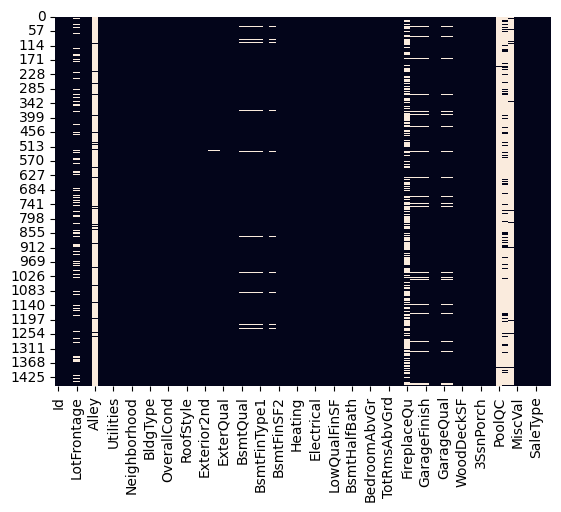

In [10]:
import seaborn as sns
sns.heatmap(dataset.isnull(),cbar=False)

In [11]:
dataset = dataset.dropna(axis=1)

<Axes: >

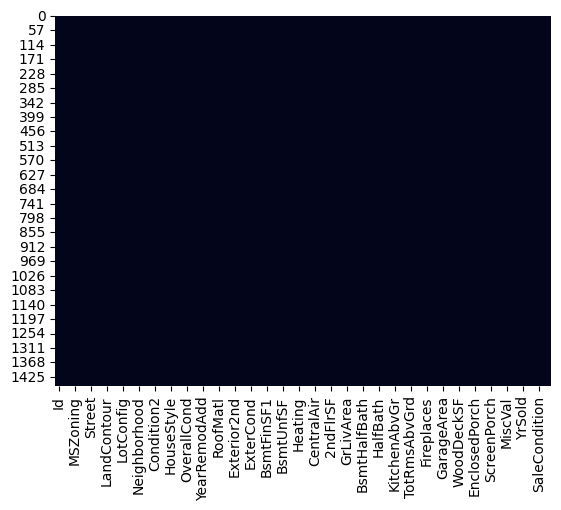

In [12]:
sns.heatmap(dataset.isnull(),cbar=False)

***Removing the string values***

In [21]:
dataset.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [22]:
dataset = dataset.applymap(lambda x: np.nan if isinstance(x, str) else x) #To replace all string data in a DataFrame with np.nan (missing value)

<Axes: >

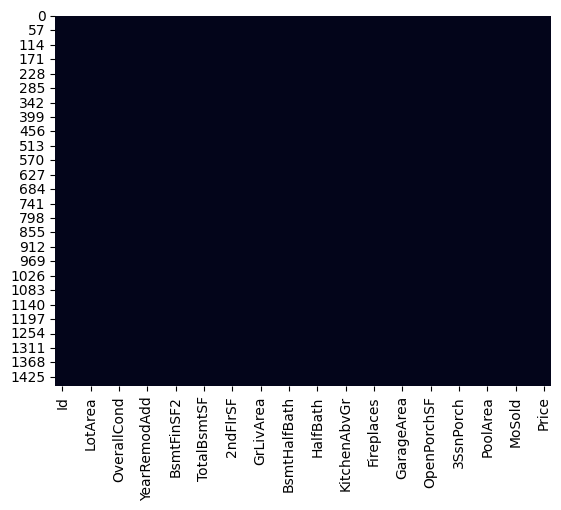

In [23]:
sns.heatmap(dataset.isnull(),cbar=False)

In [24]:
dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
Price            0
dtype: int64

In [25]:
dataset = dataset.dropna(axis=1)

<Axes: >

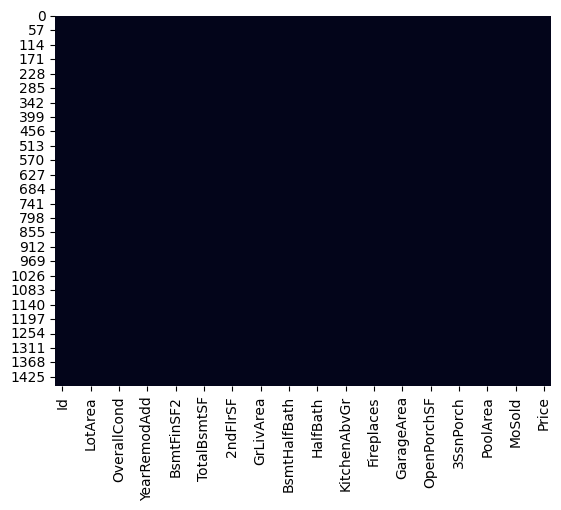

In [26]:
sns.heatmap(dataset.isnull(),cbar=False)

In [27]:
dataset.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


***Separating the independent and dependent variables***

In [28]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [29]:
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,240,366,0,112,0,0,0,0,4,2010


In [30]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64

***Train and test split***

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [117]:
x_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,136,20,10400,7,6,1970,1970,0,0,1304,...,530,98,0,0,0,0,0,0,5,2008
1452,1453,180,3675,5,5,2005,2005,547,0,0,...,525,0,28,0,0,0,0,0,5,2006
762,763,60,8640,7,5,2009,2009,24,0,732,...,614,169,45,0,0,0,0,0,6,2010
932,933,20,11670,9,5,2006,2006,0,0,1905,...,788,0,191,0,0,0,0,0,3,2007
435,436,60,10667,7,6,1996,1996,385,344,70,...,550,158,61,0,0,0,0,0,4,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,9317,6,5,2006,2006,24,0,1290,...,440,0,22,0,0,0,0,0,3,2007
1130,1131,50,7804,4,3,1928,1950,622,0,500,...,576,431,44,0,0,0,0,0,12,2009
1294,1295,20,8172,5,7,1955,1990,167,0,697,...,572,0,0,0,0,0,0,0,4,2006
860,861,50,7642,7,8,1918,1998,0,0,912,...,216,0,240,0,0,0,0,0,6,2007


In [118]:
x_test

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
892,893,20,8414,6,8,1963,2003,663,0,396,...,264,192,0,0,0,0,0,0,2,2006
1105,1106,60,12256,8,5,1994,1995,1032,0,431,...,712,186,32,0,0,0,0,0,4,2010
413,414,30,8960,5,6,1927,1950,0,0,1008,...,360,0,0,130,0,0,0,0,3,2010
522,523,50,5000,6,7,1947,1950,399,0,605,...,420,0,24,36,0,0,0,0,10,2006
1036,1037,20,12898,9,5,2007,2008,1022,0,598,...,912,228,0,0,0,0,0,0,9,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,20,8176,5,6,1958,1992,846,0,210,...,308,0,0,0,0,0,0,0,8,2007
323,324,20,5820,3,8,1955,2005,256,0,906,...,220,142,98,0,0,0,0,0,7,2006
650,651,60,8125,7,6,2007,2007,0,0,813,...,562,0,0,0,0,0,0,0,5,2008
439,440,50,12354,6,8,1920,2000,0,0,684,...,528,0,46,0,0,0,0,800,8,2009


In [119]:
y_train

135     174000
1452    145000
762     215200
932     320000
435     212000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: Price, Length: 1022, dtype: int64

In [120]:
y_test


892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: Price, Length: 438, dtype: int64

Text(0, 0.5, 'Price')

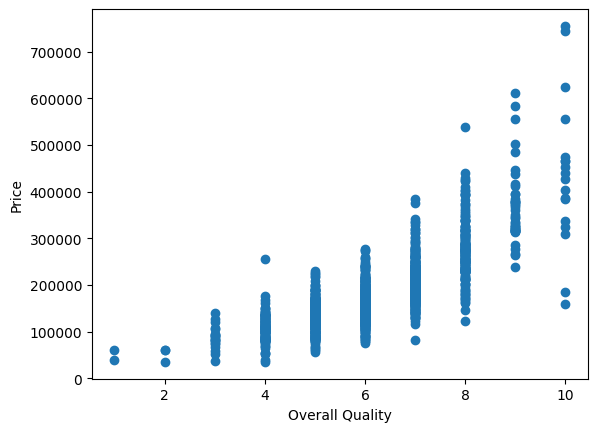

In [121]:
plt.scatter(dataset['OverallQual'], dataset['Price'])
plt.xlabel('Overall Quality')
plt.ylabel('Price')

<Axes: xlabel='OverallQual', ylabel='Price'>

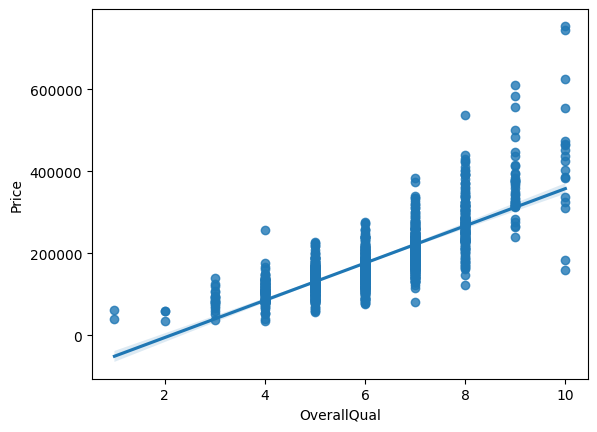

In [122]:
sns.regplot(x='OverallQual', y='Price', data=dataset)

***Standarizing the dataset***

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #values of features in dataset are calculated using different units so we need to make it one standard 

In [124]:
x_train = scaler.fit_transform(x_train)

In [125]:
x_train

array([[-1.40100022, -0.86894959, -0.03050433, ..., -0.12298707,
        -0.51494368,  0.14029267],
       [ 1.6930766 ,  2.88261838, -0.62436478, ..., -0.12298707,
        -0.51494368, -1.36896114],
       [ 0.07203407,  0.0689424 , -0.18592357, ..., -0.12298707,
        -0.13741682,  1.64954649],
       ...,
       [ 1.32188135, -0.86894959, -0.22725096, ..., -0.12298707,
        -0.89247054, -1.36896114],
       [ 0.3022691 , -0.1655306 , -0.27405334, ..., -0.12298707,
        -0.13741682, -0.61433423],
       [ 0.92719274,  1.47578039, -0.62357003, ..., -0.12298707,
        -0.13741682,  0.89491958]])

In [126]:
x_test = scaler.transform(x_test)

In [127]:
x_test

array([[ 0.37744788, -0.86894959, -0.20588081, ..., -0.12298707,
        -1.64752425, -1.36896114],
       [ 0.87785666,  0.0689424 ,  0.13339233, ..., -0.12298707,
        -0.89247054,  1.64954649],
       [-0.74788454, -0.63447659, -0.15766552, ..., -0.12298707,
        -1.2699974 ,  1.64954649],
       ...,
       [-0.19109167,  0.0689424 , -0.23140136, ..., -0.12298707,
        -0.51494368,  0.14029267],
       [-0.68680177, -0.1655306 ,  0.14204635, ...,  2.2441087 ,
         0.61763689,  0.89491958],
       [ 0.15661021,  0.0689424 ,  0.24483499, ..., -0.12298707,
         0.24011004,  0.89491958]])

***Model Training***

In [128]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [129]:
print(regression.coef_)

[-9.75868976e+02 -8.55872058e+03  4.45897013e+03  2.57813164e+04
  3.26288727e+03  9.85701901e+03  3.75663077e+03  3.16873931e+16
  1.04168866e+16  3.07252317e+16 -3.08229800e+16  3.73317542e+16
  4.22742829e+16  4.59514564e+15 -5.08845660e+16  6.17407576e+03
  1.12208419e+01  2.38186128e+03 -8.21024130e+02 -7.78437610e+03
 -2.00313034e+03  8.70945422e+03  3.11510171e+03  1.07359948e+04
 -1.13268358e+03  2.99697361e+03 -1.27455895e+03 -1.72229592e+01
  1.39571608e+03  4.10440836e+03 -1.12575928e+03 -6.96396239e+02
 -1.01977486e+02 -1.92268900e+02]


In [130]:
print(regression.intercept_)

181300.57476047787


In [131]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

***Prediction with the test data***

In [132]:
reg_pred=regression.predict(x_test)

In [133]:
reg_pred

array([153541.35736237, 307926.35715289, 116891.13821953, 181229.14810888,
       302807.22290332,  44397.55521257, 227389.82819047, 149520.5769576 ,
        41635.76966218, 151484.4789315 , 157471.99861444, 114286.89859653,
        81043.6052943 , 211046.717702  , 191409.24381937, 142543.26097344,
       216097.28274844, 136307.49860493, 118835.97801761, 233925.46879289,
       186539.63508529, 216981.75792611, 194332.98968508, 133463.29659717,
       214742.27669882, 152470.52116941, 201149.85092477,  92681.98385522,
       186852.34268497, 179824.72596824, 116116.7342782 , 272962.66352277,
       230622.61223075,  88678.326879  , 270708.04920043, 163041.43512863,
       149111.50956019, 220244.20866887, 305371.37324735,  93905.25015635,
       135666.72090516, 254031.77316671, 103399.53482456, 272888.05794154,
       131433.457269  , 130242.28076962, 104200.94714151, 130287.35860945,
       357445.82655431, 127205.70341822, 104897.32290526, 218773.15518293,
        91391.22389945, 3

In [134]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: Price, Length: 438, dtype: int64

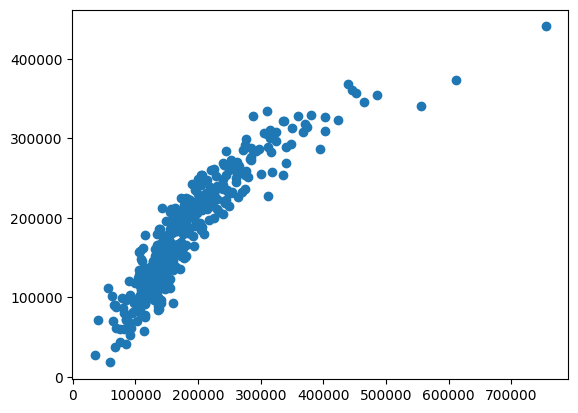

In [135]:
plt.scatter(y_test, reg_pred)

In [136]:
residuals = y_test - reg_pred
residuals

892        958.642638
1105     17073.642847
413      -1891.138220
522     -22229.148109
1036     12692.777097
            ...      
331       4436.075536
323      21631.779314
650      -3957.022279
439     -35723.689815
798     130594.393406
Name: Price, Length: 438, dtype: float64

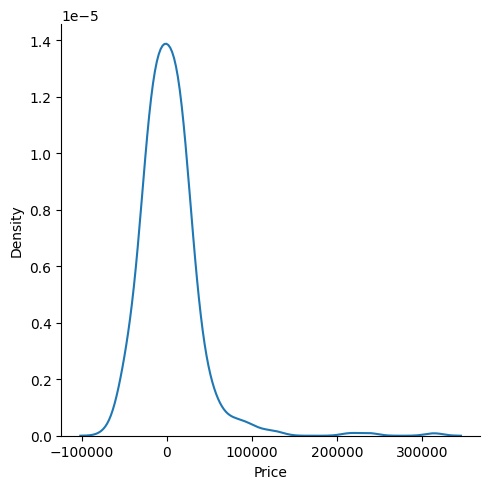

In [137]:
sns.displot(residuals, kind = 'kde')

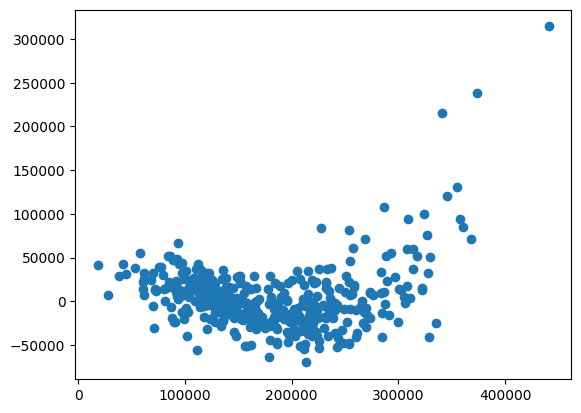

In [138]:
plt.scatter(reg_pred, residuals)

***Performance metrics***

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred)) #Cost Function
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

23352.752674668314
1281733421.9622731
35801.30475223317


In [140]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.8163204069946831


In [141]:
#adjusted R square 
1 - (1-score)*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

0.8008238656493214